# Continuous Control

---
In this notebook we will use DDPG algorithm to train 20 agents in Reacher environment. This environment is provided by [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents) toolkit.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
import sys
from unityagents import UnityEnvironment
import numpy as np
from collections import deque
import torch
import matplotlib.pyplot as plt

Import algorithms

In [2]:
import sys
sys.path.append('./code')
from random_action import RandomAction
from ddpg import DDPG

Next, we will start the environment with 20 agents.  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Reacher.app"`
- **Windows** (x86): `"path/to/Reacher_Windows_x86/Reacher.exe"`
- **Windows** (x86_64): `"path/to/Reacher_Windows_x86_64/Reacher.exe"`
- **Linux** (x86): `"path/to/Reacher_Linux/Reacher.x86"`
- **Linux** (x86_64): `"path/to/Reacher_Linux/Reacher.x86_64"`
- **Linux** (x86, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86"`
- **Linux** (x86_64, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86_64"`

For instance, if you are using a Mac, then you downloaded `Reacher.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Reacher.app")
```

In [3]:
env = UnityEnvironment(file_name='Reacher_20agents/Reacher_Windows_x86_64/Reacher.exe')

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [4]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

In this environment, a double-jointed arm can move to target locations. A reward of `+0.1` is provided for each step that the agent's hand is in the goal location. Thus, the goal of an agent is to maintain its position at the target location for as many time steps as possible.

The observation space consists of `33` variables corresponding to position, rotation, velocity, and angular velocities of the arm.  Each action is a vector with four numbers, corresponding to torque applicable to two joints.  Every entry in the action vector must be a number between `-1` and `1`.

Run the code cell below to print some information about the environment.

In [5]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 20
Size of each action: 4
There are 20 agents. Each observes a state with length: 33
The state for the first agent looks like: [ 0.00000000e+00 -4.00000000e+00  0.00000000e+00  1.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.00000000e+01  0.00000000e+00
  1.00000000e+00 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  5.75471878e+00 -1.00000000e+00
  5.55726624e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
 -1.68164849e-01]


### 3. Take Random Actions in the Environment

In the next code cell, we will show how to use the Python API to control the agents and receive feedback from the environment.
Once this cell is executed, we will watch the agents' performance, if they select actions uniformly at random with each time step. A window should pop up that allows you to observe the agents, as they follow target locations.

In [6]:
def run_algo(algo, train=False, verbose=True):

    env_info = env.reset(train_mode=train)[brain_name]
    states = env_info.vector_observations              # get the current states (for each agent)
    scores = np.zeros(num_agents)                      # initialize the score (for each agent)

    while True:
        actions = algo.act(states)                     # get next action (for each agent) 
        env_info = env.step(actions)[brain_name]       # send the action to the environment
        next_states = env_info.vector_observations     # get the next state (for each agent)
        rewards = env_info.rewards                     # get the reward (for each agent)
        dones = env_info.local_done                    # see if episode has finished
        scores += rewards                              # update the score (for each agent)
        if train:
            algo.step(states, actions, rewards, next_states, dones)
        states = next_states                           # roll over the state to next time step

        if np.any(dones):                              # exit loop if episode finished
            break

    if verbose:    
        print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))

    return scores

In [7]:
algo = RandomAction(action_size=action_size, n_agents=num_agents, seed=0)
run_algo(algo)

Total score (averaged over agents) this episode: 0.12799999713897706


array([0.37999999, 0.16      , 0.52999999, 0.07      , 0.16      ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.08      , 0.07      , 0.        , 0.        , 0.        ,
       0.        , 0.61999999, 0.        , 0.        , 0.48999999])

### 4. Run untrained agents

In the next code cell we will run untrained agents. Since the agents are untrained, their average score should be similar to the one of the agents that select random actions. A window should pop up that allows you to observe agents, as they follow target locations.

In [8]:
algo = DDPG(state_size=state_size, action_size=action_size, n_agents=num_agents, seed=0)
run_algo(algo)

c:\miniconda3\envs\drlnd\lib\site-packages\torch\nn\functional.py:1320: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Total score (averaged over agents) this episode: 0.013499999698251487


array([0.  , 0.  , 0.  , 0.  , 0.13, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.14, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ])

### 5. Train agents

In the next two code cells we will train agents using DDPG algorithm. Depending on the hardware, the training process can take a while (5 hours on my Windows 10 laptop without GPU)

In [7]:
NOISE_START = 1          # initial value of noise scaling factor
NOISE_END = 0.01         # minimal value of noise scaling factor
NOISE_DECAY = 0.995      # descay of noise scaling factor

model_file = 'checkpoint.pth'

def train_ddpg(algo, n_episodes=2000):
    """Deep Q-Learning.

    Params
    ======
        n_episodes (int): maximum number of training episodes
    """

    scores_all = []                        # list containing scores from each episode
    scores_window = deque(maxlen=100)  # last 100 scores
    algo.noise_scale = NOISE_START

    for i_episode in range(1, n_episodes+1):
        scores = run_algo(algo, train=True, verbose=False)
        scores_mean = np.mean(scores)
        scores_window.append(scores_mean)       # save mean scores from the last 100 scores
        scores_all.append(scores_mean)          # save mean scores from all episodes
        
        if i_episode % 10 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))

        if np.mean(scores_window)>=30.0:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, 
                                                                                         np.mean(scores_window)))
            algo.save_model(model_file)
            break

        algo.noise_scale = max(NOISE_END, NOISE_DECAY * algo.noise_scale)

    return scores_all

In [10]:
scores = train_ddpg(algo)

./code\ddpg.py:171: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(self.critic_local.parameters(), 1)


Episode 10	Average Score: 0.48
Episode 20	Average Score: 1.21
Episode 30	Average Score: 1.87
Episode 40	Average Score: 3.27
Episode 50	Average Score: 5.56
Episode 60	Average Score: 8.23
Episode 70	Average Score: 10.80
Episode 80	Average Score: 12.95
Episode 90	Average Score: 14.84
Episode 100	Average Score: 16.85
Episode 110	Average Score: 20.34
Episode 120	Average Score: 23.50
Episode 130	Average Score: 26.38
Episode 140	Average Score: 28.79

Environment solved in 47 episodes!	Average Score: 30.00


plot average scores

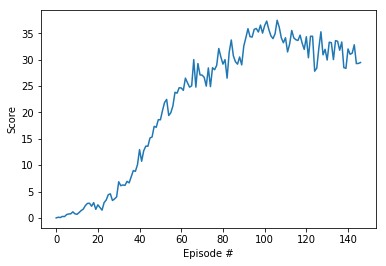

In [11]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

### 6. Run trained agents

In the next code cell we will run trained agents. Since the agents are trained, they should generate an average score that is close to 30. A window should pop up that allows you to observe the agents, as they follow target locations.

In [8]:
algo = DDPG(state_size=state_size, action_size=action_size, n_agents=num_agents, seed=0)
algo.load_model(model_file)
scores = run_algo(algo)

c:\miniconda3\envs\drlnd\lib\site-packages\torch\nn\functional.py:1320: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Total score (averaged over agents) this episode: 30.418999320082367


### 7. Close environment

In [9]:
env.close()